## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Rotem Molcho 7881
# student 2:Or Yizhakian 8443
# student 3:Or Shalem 0845
# student 4:Ievgeni Viener 8156
# (optional) student 5:Paz Elisha 5570
# (optional) student 6:Ran Samuelov 2709

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def load_display_dataset(filepath):
    df = pd.read_csv(filepath)
    print(df.head())
    return df

In [4]:
print('Train :')
df_train=load_display_dataset('diabetes_train.csv')
print('\n')
df_train.info()
print('\nTest :')
df_test=load_display_dataset('diabetes_test.csv')
print('\n')
df_test.info()


Train :
    age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  target
0  52.0  1.0  23.0  107.00  179.0  123.7  42.5  4.21  4.1589   93.0    50.0
1  22.0  1.0  18.6   97.00  114.0   57.6  46.0  2.00  3.9512   83.0   101.0
2  34.0  2.0  25.3  111.00  230.0  162.0  39.0  6.00  4.9767   90.0   181.0
3  38.0  2.0  26.8  105.00  181.0  119.2  37.0  5.00  4.8203   91.0   107.0
4  55.0  1.0  23.0   94.67  190.0  137.6  38.0  5.00  4.2767  106.0   146.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     353 non-null    float64
 1   sex     353 non-null    float64
 2   bmi     353 non-null    float64
 3   bp      353 non-null    float64
 4   s1      353 non-null    float64
 5   s2      353 non-null    float64
 6   s3      353 non-null    float64
 7   s4      353 non-null    float64
 8   s5      353 non-null    float64
 9   s6      353 non-n

In [5]:

cov_matrix = df_train.cov()
corr_matrix = df_train.corr()
display(cov_matrix)
display(corr_matrix)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,178.553084,1.089066,10.379227,63.852170,116.285419,86.171481,-10.877531,3.409679,1.711446,42.302046,198.703765
sex,1.089066,0.249243,0.189300,1.785763,0.581517,2.200904,-2.375487,0.212843,0.031729,1.202711,2.469571
bmi,10.379227,0.189300,20.408859,25.467154,36.081033,34.000581,-21.150903,2.314151,1.002546,19.194712,207.678614
bp,63.852170,1.785763,25.467154,199.318863,123.432773,84.592520,-33.203129,4.746197,2.838473,65.243629,487.080260
s1,116.285419,0.581517,36.081033,123.432773,1207.238121,941.691518,31.421376,23.986026,9.304581,130.639695,585.650423
s2,86.171481,2.200904,34.000581,84.592520,941.691518,925.815654,-75.610303,25.869449,4.797783,100.777265,428.485993
s3,-10.877531,-2.375487,-21.150903,-33.203129,31.421376,-75.610303,173.863331,-12.518074,-2.630508,-35.755473,-406.507420
s4,3.409679,0.212843,2.314151,4.746197,23.986026,25.869449,-12.518074,1.671157,0.407043,5.930486,43.197396
s5,1.711446,0.031729,1.002546,2.838473,9.304581,4.797783,-2.630508,0.407043,0.276760,2.657463,23.500593
s6,42.302046,1.202711,19.194712,65.243629,130.639695,100.777265,-35.755473,5.930486,2.657463,128.609307,347.079240


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.163252,0.171938,0.338468,0.250464,0.211942,-0.061737,0.197388,0.243460,0.279152,0.190234
sex,0.163252,1.000000,0.083932,0.253360,0.033524,0.144886,-0.360858,0.329790,0.120806,0.212429,0.063281
bmi,0.171938,0.083932,1.000000,0.399298,0.229865,0.247352,-0.355071,0.396254,0.421835,0.374659,0.588095
bp,0.338468,0.253360,0.399298,1.000000,0.251628,0.196923,-0.178361,0.260054,0.382172,0.407500,0.441359
s1,0.250464,0.033524,0.229865,0.251628,1.000000,0.890738,0.068584,0.534015,0.509036,0.331545,0.215629
s2,0.211942,0.144886,0.247352,0.196923,0.890738,1.000000,-0.188458,0.657683,0.299727,0.292055,0.180152
s3,-0.061737,-0.360858,-0.355071,-0.178361,0.068584,-0.188458,1.000000,-0.734387,-0.379213,-0.239113,-0.394394
s4,0.197388,0.329790,0.396254,0.260054,0.534015,0.657683,-0.734387,1.000000,0.598522,0.404525,0.427479
s5,0.243460,0.120806,0.421835,0.382172,0.509036,0.299727,-0.379213,0.598522,1.000000,0.445430,0.571468
s6,0.279152,0.212429,0.374659,0.407500,0.331545,0.292055,-0.239113,0.404525,0.445430,1.000000,0.391523


0.5880953851480304


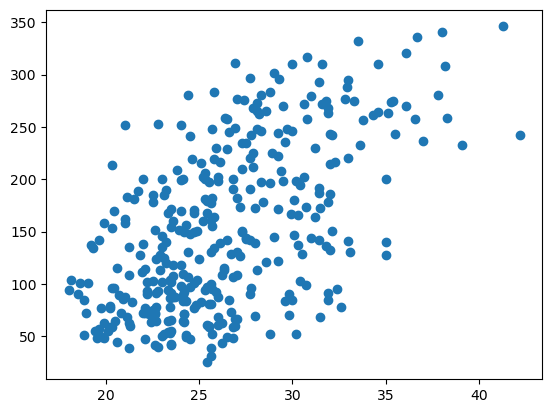

In [6]:
x = df_train['bmi']
y = df_train['target']
correlation = x.corr(y)
print(correlation)
plt.scatter(x,y)


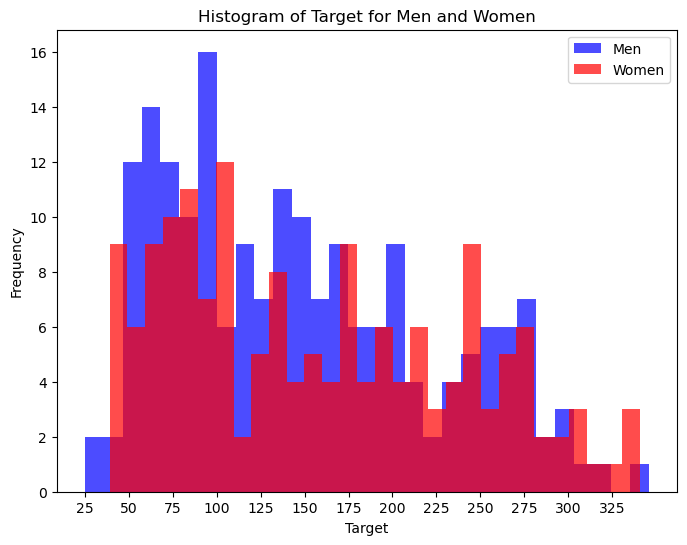

In [7]:
men = df_train[df_train['sex'] == 1.0]['target']
women = df_train[df_train['sex'] == 2.0]['target']
plt.figure(figsize=(8, 6))
plt.hist(men, bins=30, color='blue', alpha=0.7, label='Men')
plt.hist(women, bins=30, color='red', alpha=0.7, label='Women')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target for Men and Women')
plt.legend()
plt.xticks(range(int(min(df_train['target'])), int(max(df_train['target'])) + 1, 25))
plt.show()

In [8]:
#a function to use linear regression model:
def linear_model_predict(X_train,X_test,y_train,y_test,draw=True,fit_intercept = True,positive=False):
    model = LinearRegression(fit_intercept=fit_intercept,positive=positive)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    if draw:
        plt.scatter(y_test, y_pred, color='blue', label='Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
        plt.xlabel('Actual Target')
        plt.ylabel('Predicted Target')
        plt.title('Predicted vs Actual Target')
        plt.legend()
        plt.show()

Index(['bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')
Mean Squared Error: 2985.6923106514178
R-squared: 0.4347791274064914


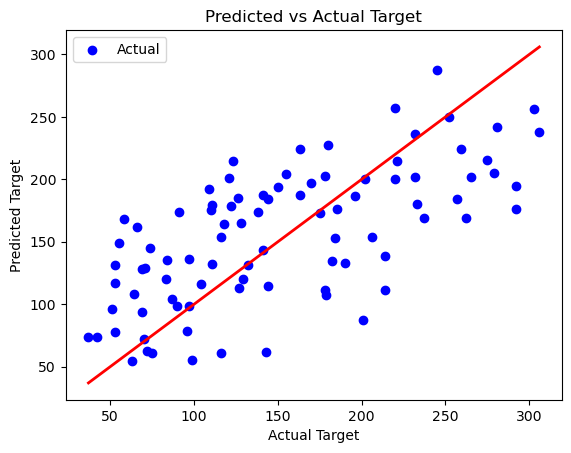

In [9]:
#first model predict after cutting insignificant features:
y = df_train['target']
threshold=0.2
significantFeatures=corr_matrix['target'][abs(corr_matrix['target'])>threshold].index
significantFeatures=significantFeatures.drop('target')
print(significantFeatures)
X_train=df_train[significantFeatures]
X_test=df_test[significantFeatures]
y_train=df_train['target']
y_test=df_test['target']
linear_model_predict(X_train,X_test,y_train,y_test)#STARTING ACUURACY WITHOUT ADDITIONAL FEATURE ENGINEER.

Mean Squared Error: 3024.384213982389
R-squared: 0.4274543701684409


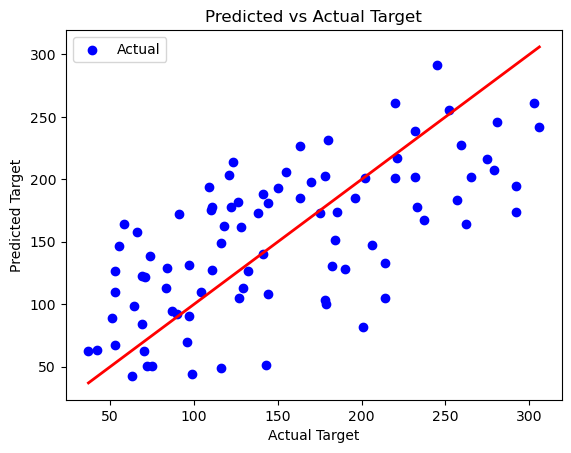

In [10]:
#using scale to scale the parameters to try and increase accuracy:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
linear_model_predict(X_train_scaled,X_test_scaled,y_train,y_test)#ADDED SCALE TO TRY TO INCREASE MODEL ACCURACY


,bmi_bp_interaction,cholesterol_ratio,target
bmi,0.855319,0.411115,0.588095
bp,0.807666,0.287398,0.441359
s1,0.268365,0.547835,0.215629
s3,-0.320429,-0.747237,-0.394394
s4,0.384588,0.978288,0.427479
s5,0.474757,0.623972,0.571468
s6,0.456647,0.412666,0.391523
bmi_bp_interaction,1.000000,0.407251,0.628097
cholesterol_ratio,0.407251,1.000000,0.439754
target,0.628097,0.439754,1.000000


Mean Squared Error: 4876.102100429065
R-squared: 0.07690599120770192


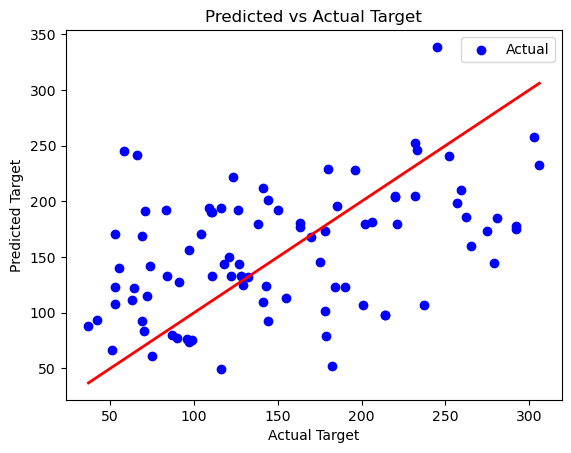

In [11]:
#adding two new features to try and increase the accuracy of the model:
X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_train2.loc[:, 'bmi_bp_interaction'] = df_train['bmi'] * df_train['bp']
X_train2.loc[:, 'cholesterol_ratio'] = df_train['s1'] / df_train['s3']
X_test2.loc[:, 'bmi_bp_interaction'] = df_train['bmi'] * df_train['bp']
X_test2.loc[:, 'cholesterol_ratio'] = df_train['s1'] / df_train['s3']
result = pd.concat([X_train2, y_train], axis=1)
wanted_columns=['bmi_bp_interaction','cholesterol_ratio','target']
correlation_matrix = result.corr()
correlation_matrix = correlation_matrix.drop(['bmi','bp','s1','s3','s4','s5','s6'],axis=1)
display(correlation_matrix)
#we can see that the correlation between the new added features and the target is high, yet the model
#accvuracy drops because of Multicollinearity, so we remove the features that correlate highly with each other (bmi,bp)
X_train2 = X_train2.drop(['bmi', 'bp'], axis=1)
X_test2 = X_test2.drop(['bmi', 'bp'], axis=1)
linear_model_predict(X_train2,X_test2,y_train,y_test)

In [12]:
# after experimenting with different feature engineer we chose the one where we kept only 
# original significant features
# running the linear regression model with different hyper parameters :
print("This is the accuracy with fit_intercept True and positive False")
linear_model_predict(X_train,X_test,y_train,y_test,False,False)
print("\nThis is the accuracy with fit_intercept True and positive True")
linear_model_predict(X_train,X_test,y_train,y_test,False,True,True)

This is the accuracy with fit_intercept True and positive False
Mean Squared Error: 3282.3524794138953
R-squared: 0.37861844438718817

This is the accuracy with fit_intercept True and positive True
Mean Squared Error: 3062.521231243317
R-squared: 0.4202346583121873


In [13]:
def decision_tree_model_predict(X_train, X_test, y_train, y_test, draw=True, max_depth=None, min_samples_split=2):
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    if draw:
        plt.scatter(y_test, y_pred, color='blue', label='Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
        plt.xlabel('Actual Target')
        plt.ylabel('Predicted Target')
        plt.title('Predicted vs Actual Target')
        plt.legend()
        plt.show()

Mean Squared Error: 5820.70786516854
R-squared: -0.10191715567122595


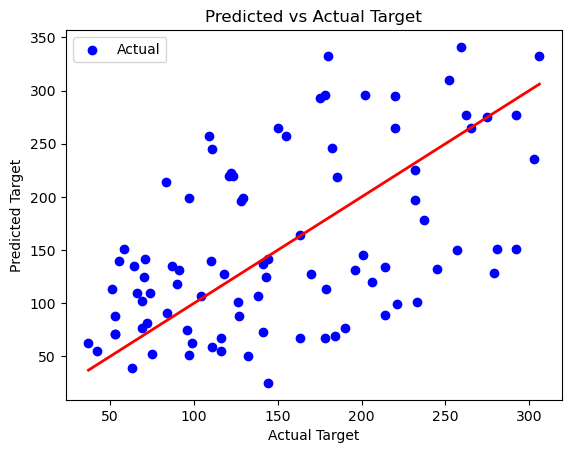

In [14]:
#With max_depth None and min samples split 2
decision_tree_model_predict(X_train, X_test, y_train, y_test, draw=True, max_depth=None, min_samples_split=2)

Mean Squared Error: 5572.74103329
R-squared: -0.05497459947123473


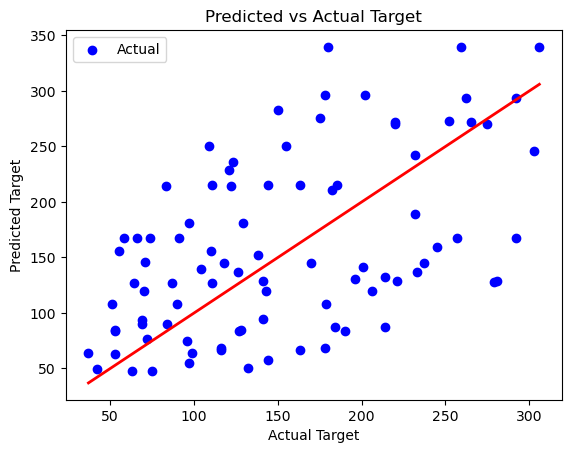

In [15]:
#With max_depth 10 and min samples split 5
decision_tree_model_predict(X_train, X_test, y_train, y_test, draw=True, max_depth=10, min_samples_split=5)

In [16]:
#5 fold cross validation - grid search method
def grid_search_cv(X, y):
    param_grid_dt = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    param_grid_lr = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }
    dt_model = DecisionTreeRegressor()
    lr_model = LinearRegression()
    grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='r2', return_train_score=True)
    grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='r2', return_train_score=True)
    grid_search_dt.fit(X, y)
    grid_search_lr.fit(X, y)
    results_dt = pd.DataFrame(grid_search_dt.cv_results_)[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score']]
    results_lr = pd.DataFrame(grid_search_lr.cv_results_)[['param_fit_intercept', 'param_positive', 'mean_test_score', 'std_test_score']]
    results_dt['Model'] = 'Decision Tree'
    results_lr['Model'] = 'Linear Regression'
    results_combined = pd.concat([results_dt, results_lr], ignore_index=True)
    return grid_search_dt.best_estimator_, grid_search_lr.best_estimator_, results_combined

In [17]:
best_dt_model, best_lr_model, results_df = grid_search_cv(X_train, y_train)
display(results_df)

,param_max_depth,param_min_samples_split,mean_test_score,std_test_score,Model,param_fit_intercept,param_positive
0,None,2,-0.171645,0.095638,Decision Tree,NaN,NaN
1,None,5,-0.074906,0.043104,Decision Tree,NaN,NaN
2,None,10,0.023374,0.055230,Decision Tree,NaN,NaN
3,10,2,-0.099863,0.094470,Decision Tree,NaN,NaN
4,10,5,-0.014845,0.071020,Decision Tree,NaN,NaN
5,10,10,0.054894,0.050819,Decision Tree,NaN,NaN
6,20,2,-0.127586,0.081519,Decision Tree,NaN,NaN
7,20,5,-0.029425,0.059966,Decision Tree,NaN,NaN
8,20,10,0.033822,0.045987,Decision Tree,NaN,NaN
9,30,2,-0.122664,0.061457,Decision Tree,NaN,NaN


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [18]:
def train_best_linear_model(X_train, y_train):
    # Select the best linear regression model (fit_intercept=True, positive=False)
    best_lr_model = LinearRegression(fit_intercept=True, positive=False)
    
    # Train the model on the training data
    best_lr_model.fit(X_train, y_train)
    
    return best_lr_model

## Part 4 - Apply on test and show model performance estimation

In [19]:
def evaluate_model(model, X_test, y_test, draw=True):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    
    if draw:
        plt.scatter(y_test, y_pred, color='blue', label='Actual')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
        plt.xlabel('Actual Target')
        plt.ylabel('Predicted Target')
        plt.title('Predicted vs Actual Target')
        plt.legend()
        plt.show()

Mean Squared Error: 2985.6923106514178
R-squared: 0.4347791274064914


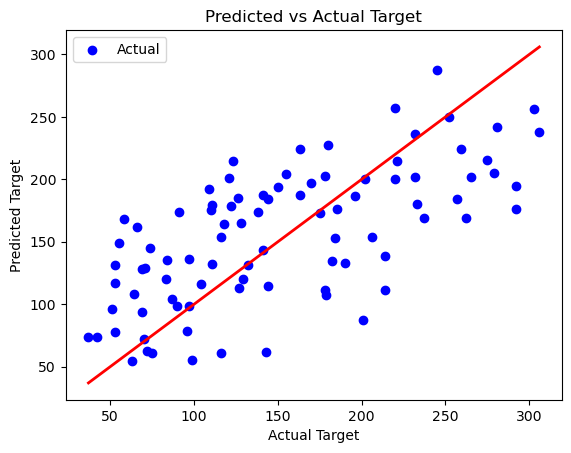

In [20]:
#evaluate model on test
trained_model = train_best_linear_model(X_train, y_train)

evaluate_model(trained_model, X_test, y_test)